# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print(states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [11]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import torch
from collections import deque
import pandas as pd
import json

def test(agent):
    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    dones = np.array([False for _ in range(num_agents)])
    for _ in range(1000):
        actions = agent.act(states, add_noise=False)
        env_info = env.step(actions.astype(np.int32))[brain_name]        # send the action to the environment
        states = env_info.vector_observations   # get the next state
        rewards = env_info.rewards                   # get the reward
        dones = env_info.local_done                  # see if episode has finished
        scores += rewards
        if np.any(dones):
            break
    return np.max(scores)

def ddpg(agent, folder, n_episodes=300, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    tot_scores = []
    max_score = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)
            env_info = env.step(actions.astype(np.int32))[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        score = max(scores)
        scores_deque.append(score)
        tot_scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f} noise: {:.6f}'.format(i_episode, np.mean(scores_deque), agent.agents[0].noise_scalar), end="")
        try:
            torch.save(agent.agents[0].actor_local.state_dict(), f'{folder}/checkpoint_actor.pth')
            torch.save(agent.agents[0].critic_local.state_dict(), f'{folder}/checkpoint_critic.pth')
            df = pd.DataFrame(tot_scores)
            df.to_csv(f"{folder}/scores.csv", index=False)
        except PermissionError:
            # prevents crashes
            pass
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                
            
    return tot_scores

In [6]:
ver_name = "v6.0"
hyperparameters = {
    "ddpg": {
        "lr_actor": 1e-4,
        "lr_critic": 3e-4,
        "actor_l1": 300,
        "actor_l2": 150,
        "critic_l1": 400,
        "critic_l2": 200,
        "noise_scalar": 0.05,
        "noise_decay": 0.999,
    },
    "multi_agent": {
        "learn_every_t_steps": 10,
        "learn_n_times": 20,
    }
}

In [7]:
import json
import os
from maddpg import MultiAgent
from ddpg_agent import DDPGAgent

def create_agent(params):
    ddpg = DDPGAgent(
        state_size=24,
        full_state_size=24*2,
        action_size=2,
        full_action_size=2*2,
        **params["ddpg"],
    )
    return MultiAgent(
        agents=[ddpg, ddpg],
        **params["multi_agent"],
    )

def train(ver, params, agent=None, episodes=300):
    new_path = f"training/run{ver}"
    if os.path.exists(new_path):
        raise Exception("this version already exists")
    os.mkdir(new_path)
    with open(f"{new_path}/checkpoint.json", "w") as file:
        file.write(json.dumps(params))
        
    agent = agent or create_agent(params)
    return ddpg(agent, new_path, n_episodes=episodes, print_every=100), agent

def agent_from_ver(ver):
    folder = f"training/run{ver}"
    agent = create_agent(hyperparameters)
    agent.agents[0].actor_local.load_state_dict(torch.load(f'{folder}/checkpoint_actor.pth'))
    agent.agents[0].critic_local.load_state_dict(torch.load(f'{folder}/checkpoint_critic.pth'))
    agent.agents[0].soft_update(agent.agents[0].actor_local, agent.agents[0].actor_target, 1)
    agent.agents[0].soft_update(agent.agents[0].critic_local, agent.agents[0].critic_target, 1)
    
    return agent

In [9]:
agent = agent_from_ver("v5.5")
# continue training on the previously trained network
scores, agent = train(ver_name, hyperparameters, agent=agent, episodes=2000)

Episode 100	Average Score: 0.12 noise: 0.000001
Episode 200	Average Score: 0.23 noise: 0.000000
Episode 300	Average Score: 0.15 noise: 0.000000
Episode 400	Average Score: 0.21 noise: 0.000000
Episode 500	Average Score: 0.27 noise: 0.000000
Episode 600	Average Score: 0.26 noise: 0.000000
Episode 700	Average Score: 0.22 noise: 0.000000
Episode 800	Average Score: 0.18 noise: 0.000000
Episode 900	Average Score: 0.30 noise: 0.000000
Episode 1000	Average Score: 0.35 noise: 0.000000
Episode 1100	Average Score: 0.45 noise: 0.000000
Episode 1200	Average Score: 0.32 noise: 0.000000
Episode 1300	Average Score: 0.51 noise: 0.000000
Episode 1400	Average Score: 0.22 noise: 0.000000
Episode 1500	Average Score: 0.17 noise: 0.000000
Episode 1600	Average Score: 0.18 noise: 0.000000
Episode 1700	Average Score: 0.26 noise: 0.000000
Episode 1800	Average Score: 2.12 noise: 0.000000
Episode 1900	Average Score: 2.06 noise: 0.000000
Episode 2000	Average Score: 1.46 noise: 0.000000


In [10]:
import matplotlib.pyplot as plt

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n
    
def overlay_moving_average(title, score, n):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    avg = moving_average(score, n)
    plt.plot(np.arange(len(score)), score)
    plt.plot(np.arange(len(avg)) + n, avg)
    plt.plot([0, len(score)], [0.5, 0.5], 'r--')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.xlim(0, len(score))
    plt.title(title)
    plt.show()

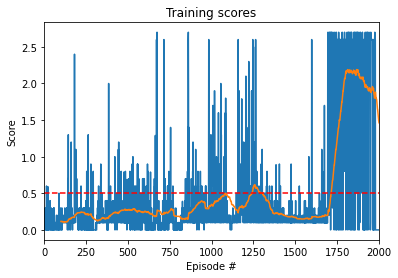

In [11]:
overlay_moving_average("Training scores", scores, 100)

### Whole training results

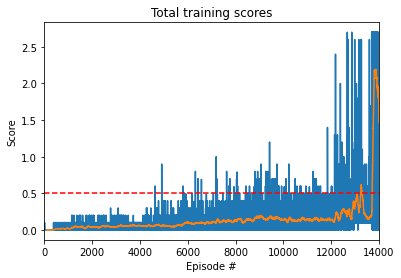

In [13]:
import pandas as pd

df1 = pd.read_csv(f"training/runv5.0/scores.csv")
previous_scores1 = df1.mean(axis=1).to_numpy()
df2 = pd.read_csv(f"training/runv5.5/scores.csv")
previous_scores2 = df2.mean(axis=1).to_numpy()
total_scores = np.concatenate([previous_scores1, previous_scores2, np.array(scores)])
overlay_moving_average("Total training scores", total_scores, 100)

### Test the agent

{'ddpg': {'lr_actor': 0.0001, 'lr_critic': 0.0003, 'actor_l1': 300, 'actor_l2': 150, 'critic_l1': 400, 'critic_l2': 200, 'noise_scalar': 0.05, 'noise_decay': 0.999}, 'multi_agent': {'learn_every_t_steps': 10, 'learn_n_times': 20}}
Average test score over 100 episodes: 2.419000036045909


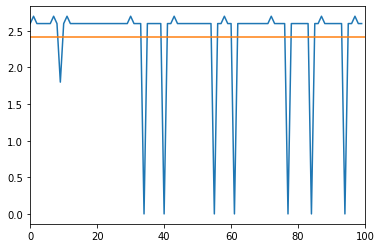

In [14]:
folder = f"training/run{ver_name}"
with open(f"{folder}/checkpoint.json", "rb") as file:
    params = json.load(file)
print(params)
agent = create_agent(params)
# load best agent (I saved it manually during the training around episode 1800)
agent.agents[0].actor_local.load_state_dict(torch.load(f'{folder}/checkpoint_actor_top.pth'))

def test(agent):
    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    dones = np.array([False for _ in range(num_agents)])
    for _ in range(1000):
        actions = agent.act(states, add_noise=False)
        env_info = env.step(actions.astype(np.int32))[brain_name]        # send the action to the environment
        states = env_info.vector_observations   # get the next state
        rewards = env_info.rewards                   # get the reward
        dones = env_info.local_done                  # see if episode has finished
        scores += rewards
        if np.any(dones):
            break
    return np.max(scores)

live_test_scores = []
for i in range(100):
    live_test_scores.append(test(agent))
    
mean_test_val = np.array(live_test_scores).mean()
print(f"Average test score over 100 episodes: {mean_test_val}")
plt.plot(live_test_scores)
plt.plot([0, 100], [mean_test_val]*2)
plt.xlim(0, 100)
plt.show()

### See the agent perform

In [15]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
scores = np.zeros(num_agents)
dones = np.array([False for _ in range(num_agents)])
for _ in range(1000):
    actions = agent.act(states, add_noise=False)
    env_info = env.step(actions.astype(np.int32))[brain_name]        # send the action to the environment
    states = env_info.vector_observations   # get the next state
    rewards = env_info.rewards                   # get the reward
    dones = env_info.local_done                  # see if episode has finished
    scores += rewards
    if np.any(dones):
        break
print(np.max(scores))

2.600000038743019


In [16]:
env.close()